[*********************100%***********************]  9 of 9 completed


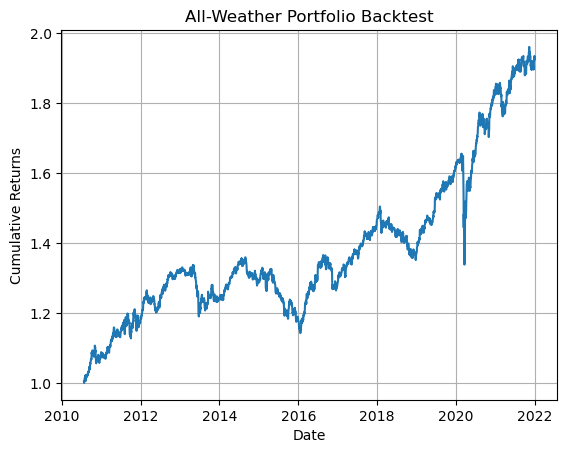

Annualized Return (CAGR): 3.04%
Annualized Volatility: 7.76%
Profitable Months (%): 31.82%
Maximum Drawdown: -19.16%


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
    return data

def calculate_weights(data):
    # Calculate weights based on inverse volatility
    volatilities = data.pct_change().std()
    weights = 1 / volatilities
    weights /= weights.sum()
    return weights

def calculate_returns(data, weights):
    # Calculate portfolio returns
    portfolio_returns = data.pct_change().dot(weights)
    return portfolio_returns

def calculate_mdd(cumulative_returns):
    # Calculate the drawdowns
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak

    # Find the maximum drawdown
    max_drawdown = drawdown.min()

    return max_drawdown

def calculate_cagr(total_return, num_years):
    # Calculate Compound Annual Growth Rate (CAGR)
    cagr = (total_return ** (1 / num_years)) - 1

    return cagr

def backtest_all_weather_portfolio(tickers, start_date, end_date):
    # Get data
    data = get_data(tickers, start_date, end_date)

    # Calculate weights
    weights = calculate_weights(data)

    # Calculate returns
    portfolio_returns = calculate_returns(data, weights)

    # Calculate cumulative returns
    cumulative_returns = (portfolio_returns + 1).cumprod()

    # Calculate annualized returns
    total_return = cumulative_returns[-1]
    num_years = len(data) / 252  # Assume 252 trading days in a year
    annualized_return = calculate_cagr(total_return, num_years)

    # Calculate annualized volatility
    annualized_volatility = portfolio_returns.std() * np.sqrt(252)

    # Calculate monthly returns
    monthly_returns = portfolio_returns.resample('M').sum()

    # Calculate maximum drawdown
    max_drawdown = calculate_mdd(cumulative_returns)

    # Perform rebalancing every year
    yearly_rebalance_dates = pd.date_range(start=start_date, end=end_date, freq='AS')
    for date in yearly_rebalance_dates:
        weights = calculate_weights(data.loc[:date])
        portfolio_returns.loc[date:] = calculate_returns(data.loc[date:], weights)

    # Plot cumulative returns
    plt.plot(cumulative_returns)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.title('All-Weather Portfolio Backtest')
    plt.grid(True)
    plt.show()

    # Print performance metrics
    print("Annualized Return (CAGR): {:.2%}".format(annualized_return))
    print("Annualized Volatility: {:.2%}".format(annualized_volatility))
    print("Profitable Months (%): {:.2%}".format((monthly_returns > 0).mean()))
    print("Maximum Drawdown: {:.2%}".format(max_drawdown))

# Define the tickers and the date range
tickers = ["SPY", "EFA", "EEM", "GLD", "DBC", "EDV", "LTPZ", "LQD", "EMLC"]
start_date = "2000-01-01"
end_date = "2022-01-01"

# Run the backtest
backtest_all_weather_portfolio(tickers, start_date, end_date)
